In [1]:
# import libraries

from PIL import Image
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, classification_report
from matplotlib import pyplot as plt
from sklearn import metrics

import pandas as pd
import glob
import seaborn as sns
import sklearn
import random
import numpy as np

### Glioma Tumor
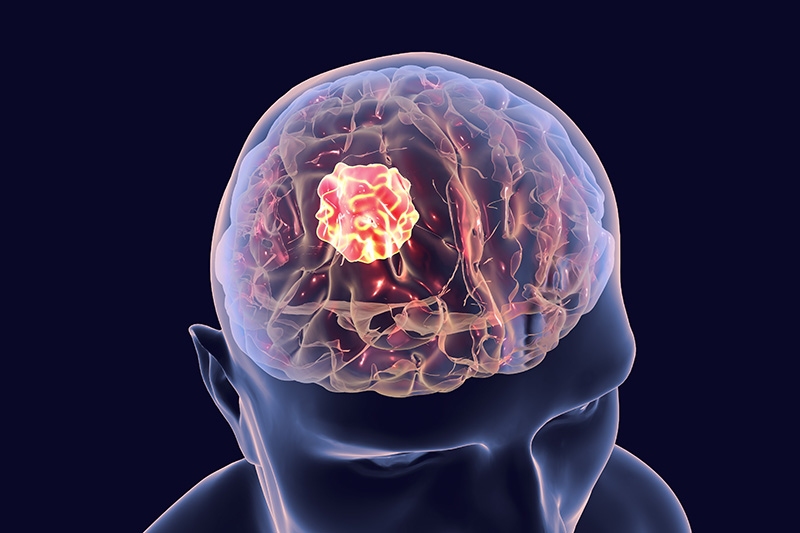

In [2]:
# load the data

glioma_data = glob.glob("C:/Users/almag/Desktop/CS156/braintumor/gliomas/*")
healthy_data = glob.glob("C:/Users/almag/Desktop/CS156/braintumor/healthy/*")

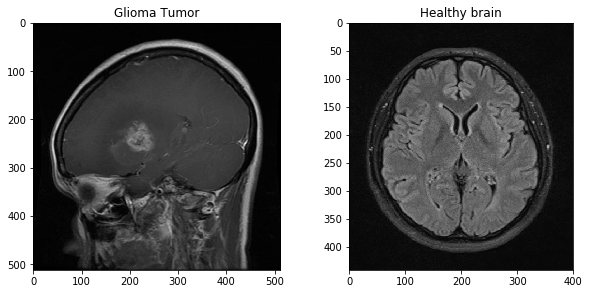

In [3]:
# plot the difference based on our data

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,3)
ax1.imshow(Image.open(glioma_data[9]))
ax2 = fig.add_subplot(2,2,4)
ax2.imshow(Image.open(healthy_data[6]))
ax1.title.set_text('Glioma Tumor')
ax2.title.set_text('Healthy brain')

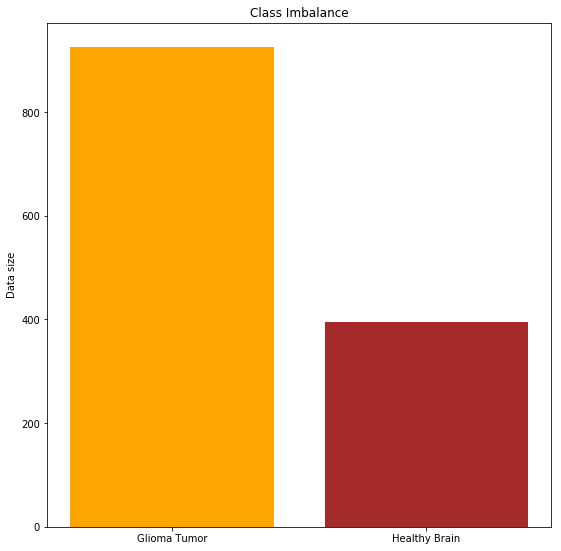

In [4]:
# check for class balance

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])

tumors = ['Glioma Tumor',
          'Healthy Brain']

data_size = [len(glioma_data),
             len(healthy_data)]

plt.bar(tumors, data_size, color=['orange',  
                                  'brown'])
plt.ylabel('Data size')
plt.title('Class Imbalance')
plt.show()

# Binary Classification

## Glioma {} Healthy

In [5]:
# undersampling to address the class imbalance
glioma_sample = random.sample(glioma_data, len(healthy_data)) 

In [6]:
# pre-process the image data by:
# --------------------------------------------
# opening
# resizing
# converting them to arrays
# flattening
# --------------------------------------------

glioma_processed = []

for image in glioma_sample:
    img_g = Image.open(image)
    img_g = img_g.resize((70, 70), resample=0)
    img_g = np.array(img_g).flatten()
    glioma_processed.append(img_g)
    
healthy_processed = []

for image in healthy_data:
    img_h = Image.open(image)
    img_h = img_h.resize((70, 70), resample=0)
    img_h = np.array(img_h).flatten()
    healthy_processed.append(img_h)

In [7]:
# check if we have class balance

len(glioma_processed) == len(healthy_processed)

True

In [8]:
# label the data

# tumor: 1
# healthy: 0

glioma = np.asarray([(pic, 1) for pic in glioma_processed])
healthy = np.asarray([(pic, 0) for pic in healthy_processed])

X = np.append(glioma[:,0], healthy[:,0])
Y = np.append(glioma[:,1], healthy[:,1])
X = np.stack(i for i in X)
Y = np.stack(i for i in Y)

C:\Users\almag\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\almag\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\almag\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is d

In [9]:
from sklearn.model_selection import train_test_split

# distributing test and train data as 80% - 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Logistic Regression

In [10]:
# train a logistic regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [11]:
# perform cross validation to avoid overfitting

from sklearn. model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, Y_train, cv=10)
scores

array([0.84375   , 0.828125  , 0.78125   , 0.85714286, 0.85714286,
       0.80952381, 0.84126984, 0.87301587, 0.85714286, 0.80952381])

In [12]:
# take a look at the prediction metrics

Y_pred = logreg.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        83
           1       0.84      0.82      0.83        76

    accuracy                           0.84       159
   macro avg       0.84      0.84      0.84       159
weighted avg       0.84      0.84      0.84       159



Text(0.5,257.44,'Predicted label')

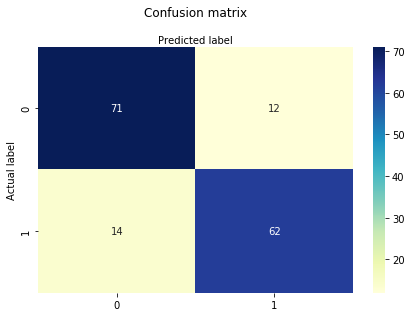

In [13]:
# print confusion matrix to see clearly
# the count of misclassification
# as either false-positive or false-negative

confusion = confusion_matrix(Y_test, Y_pred)
class_names=['Healthy', 'Tumor'] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt="g"
)
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### PCA + Logistic Regression

In [14]:
from sklearn.decomposition import PCA

# transform the features of the brain images
# into 2 components with PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test) 

In [15]:
# perform logistic regression on the 
# transformed data
logreg_PCA = LogisticRegression()
logreg_PCA.fit(X_train_PCA, Y_train)

# check cross-validation scores to avoid
# overfitting
scores = cross_val_score(logreg, X_train_PCA, Y_train, cv=10)
scores

array([0.6875    , 0.625     , 0.828125  , 0.71428571, 0.84126984,
       0.77777778, 0.80952381, 0.74603175, 0.79365079, 0.77777778])

In [16]:
# check the performance metrics

Y_pred_PCA = logreg_PCA.predict(X_test_PCA)
print(metrics.classification_report(Y_test, Y_pred_PCA))

              precision    recall  f1-score   support

           0       0.85      0.60      0.70        83
           1       0.67      0.88      0.76        76

    accuracy                           0.74       159
   macro avg       0.76      0.74      0.73       159
weighted avg       0.76      0.74      0.73       159



Text(0.5,257.44,'Predicted label')

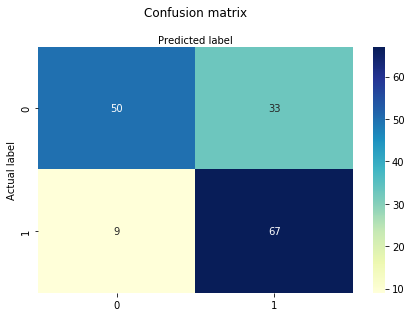

In [17]:
# print confusion matrix to see clearly
# the count of misclassification
# as either false-positive or false-negative

confusion = confusion_matrix(Y_test, Y_pred_PCA)
class_names=['Healthy', 'Tumor'] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt="g"
)
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### SVC (kernel=linear)

In [18]:
# train a SVC model with linear kernel

from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma='auto')
svc.fit(X_train,Y_train)

SVC(gamma='auto', kernel='linear')

In [19]:
# perform cross-validation to avoid overfitting

scores = cross_val_score(svc, X_train, Y_train, cv=10)
scores

array([0.890625  , 0.828125  , 0.828125  , 0.88888889, 0.88888889,
       0.80952381, 0.92063492, 0.85714286, 0.87301587, 0.85714286])

In [20]:
# check performance metrics

Y_pred_SVC = svc.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred_SVC))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        83
           1       0.90      0.91      0.90        76

    accuracy                           0.91       159
   macro avg       0.91      0.91      0.91       159
weighted avg       0.91      0.91      0.91       159



Text(0.5,257.44,'Predicted label')

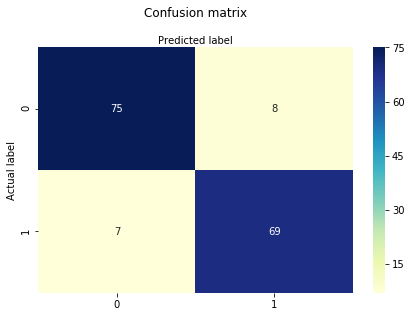

In [21]:
# print confusion matrix to see clearly
# the count of misclassification
# as either false-positive or false-negative

confusion = confusion_matrix(Y_test, Y_pred_SVC)
class_names=['Healthy', 'Tumor'] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt="g"
)
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')